# **TP5 : Interfaces**
### Ecrire un programme permettant de créer une calculatrice avec la librairie *tkinter*. 

### Cette calculatrice permettra de réaliser les opérations de bases : `+`, `-`, `*` et `/`. Il faudra également une touche `.` pour la virgule et une touche `c` pour le clear. Le programme devra être programmé en **objets**, vous devez créer une classe «`Fenetre`». En supplément, vous devrez ajouter les touches `sin`, `cos`, `tan`, `π`, `x²`, `√x`. Ainsi de mettre en place un **historique** de vos opérations.

On commence par importer les modules dont nous allons avoir besoin :

In [1]:
from tkinter import *
from functools import partial
from math import sin, cos, tan, sqrt, pi

`tkinter` est le module dont nous nous servons pour créer l'interface graphique.

`partial` dans "`from functools import partial`" est une méthode servant à appeler une fonction, nous allons nous en servir pour les boutons de la calculatrice car si nous passons directement la fonction en commande d'un bouton, elle sera exécutée lors de la création du bouton et non de son appui. Avec partial, on appellera la fonction à chaque fois que l'on appuyera sur le bouton.

On termine par importer les fonctions mathématique dont nous allons avoir besoin pour la calculatrice :
`from math import sin, cos, tan, sqrt, pi`

On définit ensuite la classe `Fenetre`.

In [7]:
class Fenetre(Tk):
    def __init__(self, l=100, h=100, texte=""):

        # Initialiser la classe mère
        Tk.__init__(self)

        # On définit le titre de la fenêtre
        self.title(texte)

        # On récupère la longueur et largeur de l'écran
        largeur_ecran = self.winfo_screenwidth()
        hauteur_ecran = self.winfo_screenheight()

        # Avec les dimensions de la fenêtre et de l'écran, on place la fenêtre au centre de l'écran
        # On utilise des divisions euclidiennes "//" pour être sûrs d'avoir un résultat entier
        pos_x = largeur_ecran // 2 - l // 2
        pos_y = hauteur_ecran // 2 - h // 2

        # Avec les valeurs des dimensions et positionnements que nous avons obtenu, nous dimensionnons la fenêtre
        geometry = f"{l}x{h}+{pos_x}+{pos_y}"
        self.geometry(geometry)

        # Nous rajoutons un expacement entre le bord de la fenêtre et ses éléments pour plus de lisibilité
        self.config(padx=30)

        # Nons initialisons des dictionnaires allant contenir nos widgets, description détaillée sous le code
        # Nous initialisons aussi une liste allant contenir l'historique des calculs et un pointeur d'historique
        self.label, self.button, self.historique = dict(), dict(), ['']
        self.historique_index = 0

        # Nous utilisons une StringVar allant contenir le calcul
        self.var_affichage = StringVar()

        # Nous appelons une méthode qui créera tous les widgets
        self.build()

    # La méthode build a pour rôle de créer les widgets, de "construire" le contenu de la fenêtre
    def build(self):
        # On ne créé ici pas directements les widgets mais on passe par des méthodes servant à le faire
        # On commence par créer un label 'calculatrice' et un label allant être l'écran de la calculatrice
        self.create_label('calc', 'Calculatrice', 1, 2, columnspan=3)
        self.create_label('affichage', '', 2, 1, columnspan=5, label_affichage=True)

        # On créé ensuite tous les boutons
        self.create_button('1', '1', 3, 1)
        self.create_button('2', '2', 3, 2)
        self.create_button('3', '3', 3, 3)
        self.create_button('4', '4', 4, 1)
        self.create_button('5', '5', 4, 2)
        self.create_button('6', '6', 4, 3)
        self.create_button('7', '7', 5, 1)
        self.create_button('8', '8', 5, 2)
        self.create_button('9', '9', 5, 3)
        self.create_button('+', '+', 3, 4)
        self.create_button('-', '-', 4, 4)
        self.create_button('*', '*', 5, 4)
        self.create_button('=', '=', 7, 1, commande=self.resultat)
        self.create_button('0', '0', 6, 2)
        self.create_button('.', '.', 6, 3)
        self.create_button('/', '/', 6, 4)
        self.create_button('sin(', 'sin', 3, 5)
        self.create_button('cos(', 'cos', 4, 5)
        self.create_button('tan(', 'tan', 5, 5)
        self.create_button('pi', 'π', 6, 1)
        self.create_button('**2', 'x²', 7, 3)
        self.create_button('sqrt(', '√x', 7, 4)
        self.create_button(')', ')', 7, 5)
        self.create_button('(', '(', 6, 5)
        self.create_button('clear', 'c', 7, 2, commande=self.reset)
        self.create_button('descendre', '         ↓         ', 8, 4, columnspan=2, commande=self.descendre)
        self.create_button('monter', '         ↑         ', 8, 1, columnspan=2, commande=self.monter)
        self.create_button('quitter', 'Quit', 8, 3, commande=self.destroy)

    # Méthode de création de label
    def create_label(self, index, texte, ligne, colonne, columnspan=1, label_affichage=False):
        # On traite à part le cas du label servant d'écran car il a une fonction et une apparence différente
        # On reconnaît si le label en cours de créatione est un label d'affichage ou non grâce à l'argument label_affichage
        if label_affichage:
            # On définit le label d'affichage et on définit au passage son apparence
            self.label[index] = Label(self, textvar=self.var_affichage, relief='sunken', borderwidth=12)
            self.label[index].config(width=45, bg='white', anchor='e')
        else:
            # Si ce n'est pas le label d'affichage, on construit un label normal
            self.label[index] = Label(self, text=texte)
        # On place enfin le label nouvellement créé
        self.label[index].grid(row=ligne, column=colonne, columnspan=columnspan)

    # Méthode de création de boutons
    def create_button(self, index, texte, ligne, colonne, columnspan=1, commande=None):
        # On commence par définir une couleur du bouton en fonction du bouton considéré
        # "color" est la couleur du bouton et "a_color" (active color) est la couleur du bouton
        # lorsque la souris le survole
        # On fait une vérification de présence sur des ensembles car c'est plus optimisé qu'une vérification de présence sur 
        if texte in {'π', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.'}:
            color = '#EEEE00'
            a_color = '#FFFF22'
        elif texte in {'+', '-', '*', '/', 'x²', '√x', '(', ')', 'sin', 'cos', 'tan'}:
            color = '#6699EE'
            a_color = '#77AAFF'
        elif texte in {'         ↑         ', '         ↓         '}:
            color = '#DFA000'
            a_color = '#EEAF00'
        elif texte == 'Quit':
            color = '#DD0000'
            a_color = '#FF2222'
        else:
            color = '#009900'
            a_color = '#11AA11'

        # Si aucune commande n'a été passée en argument, alors le bouton est un bouton d'écriture
        # On fait donc appel à "partial()" pour écrire le texte à ajouter
        if commande is None:
            self.button[index] = Button(self, text=texte, command=partial(self.ecrire, index), bg=color, activebackground=a_color, relief='raised', borderwidth=12)
        # Sinon, on se contente d'utiliser la commande passée en paramètre (bouton quitter, bouton effacer... etc)
        else:
            self.button[index] = Button(self, text=texte, command=commande, bg=color, activebackground=a_color, relief='raised', borderwidth=12)
        # On termine par placer le bouton
        self.button[index].grid(row=ligne, column=colonne, columnspan=columnspan, padx=5, pady=5)

    # Méthode pour écrire la "valeur" d'une touche à l'écran lorsqu'elle est pressée
    def ecrire(self, caractere):
        # Si on est en train d'écrire, on ne navique plus dans l'historique, on remet donc le curseur à 0
        self.historique_index = 0
        
        # On récupère la StringVar contenant le contenu de "l'écran" et on modifie ensuite le contenu de l'écran
        text = self.var_affichage.get()
        self.var_affichage.set(f"{text}{caractere}")

    # Méthode pour effacer le contenu de l'écran
    def reset(self):
        # Lorsqu'on veut effacer le contenu de l'écran, on définit la variable de contenu d'écran à ""
        self.var_affichage.set("")
        
        # On met le curseur à 0 pour sortir de l'historique si on était en train de le visionner
        self.historique_index = 0

    # Méthode pour calculer un résultat une fois l'expression entrée
    def resultat(self):
        # Lorsqu'on affiche un résultat, on l'affiche
        # On montre donc le dernier calcul effectué, on est donc 
        # plus en position 0 mais en position 1 de l'historique
        self.historique_index = 1

        # On définit une fonction servant à arrondir un nombre à 10**8
        # On utilise cette fonction pour éviter les erreurs de python de type : 0.1 + 0.1 + 0.1 = 0.30000000000004
        def truncate(n):
            return int(n * 10**8) / 10**8

        # On récuprère le contenu de l'expression
        calcul = self.var_affichage.get()
        
        # On effectue tout le traitement dans un "try" afin d'afficher une
        # erreur en cas de problème (division par 0, erreur de syntaxe, etc)
        # "eval()" permet de transformet une expression sous forme de chaîne de caractere en vraie expression
        # on applique notre fonction d'arrondissement "truncate()" définie précédemment
        try:
            resultat = truncate(eval(calcul))
        except SyntaxError:
            resultat = 'ERREUR SYNTAXE'
        except TypeError:
            resultat = 'ERREUR TYPE'
        except ValueError:
            resultat = 'ERREUR VALEUR'
        except ZeroDivisionError:
            resultat = 'ERREUR DIVISION PAR 0'
        except Exception:
            resultat = 'ERREUR'
        
        # On change ensuite le contenu de la variabe d'écran
        self.var_affichage.set(f"{calcul} = {resultat}")
        
        # on ajoute ensuite l'opération à l'historique, en position 1
        self.historique.insert(1, f"{calcul} = {resultat}")

    # Méthode pour afficher le contenu précédent dans l'historique
    def monter(self):
        if self.historique_index + 1 <= len(self.historique) - 1:
            self.historique_index += 1
            self.var_affichage.set(self.historique[self.historique_index])

    # Méthode pour afficher le contenu suivant dans l'historique
    def descendre(self):
        if self.historique_index - 1 >= 0:
            self.historique_index -= 1
            self.var_affichage.set(self.historique[self.historique_index])

## **Explications complémentaires aux commentaires :**

### **Méthode \_\_init\_\_**
On fait hériter notre classe fenêtre de `Tk` de tkinter, `Tk` servant à créer notre interface graphique, d'où `Fenetre(Tk)` et `Tk.__init__(self)`.

On fait ensuite les opérations classique, à savoir dnner un titre à la fenêtre, la dimensionner et positionner, éventuellement ajouter un espacement `padx` pour plus de lisibilité

On initialise ensuite des dictionnaire. Ces dictionnaire vont nous servir à mieux organiser nos widgets. Plutôt que de les mettre dans des variables de façon désorganisées, nous créons ici un dictionnaire pour les labels : `self.label` et un pour les boutons : `self.button`. Cela simplie grandement l'accès aux boutons, par exemple si on veut accéder au bouton "3", on utilisera `self.button['3']`, si on veut accéder au bouton quitter, on utilisera `self.button['quitter']`. Une autre raison de l'utilisation de dictionnaire est le fait que cela rend la création des boutons plus simple, rapide et lisible. Dans ce code, nous avons ici des méthodes conçues pour créer les différents widgets, en passant en argument l'index du dictionnaire et quelques autres paramètres, on peut facilement créer les widgets en passant par ces méthodes et en les ajoutant au dictionnaire. L'utilisaton de méthodes aurait été beaucoup plus compliqué en utilisant directement des variables.

`self.historique` est une liste allant contenir notre historique d'opérations, nous l'initialison à `['']`, avoir un premier élément vide nous sera utile par la suite.
On définit également un pointeur, `self.historique_index` que l'on initialise à 0. Cet attribut est un pointeur qui nous servira à nous repérer en nous donnant notre position dans l'historique lorsque nous naviguerons dedans.

On initialise ensuite `self.var_affichage`, qui sera une `StringVar()`, et qui contiendra le contenu de l'écran de la calculatrice. On utilisera cet attribut pour récupérer le contenu de l'expression à l'écran et faire les calculs ou tout simplement directement afficher à l'écran.

Cette technique n'est pas la seule possible, on aurait également pu directement écrire dans le label avec des `.config(text="")` à chaque modification et récupérer le contenu du label avec `.cget('text')` lorsque l'on veut effectuer le calcul. Ce n'est pas l'options que nous avons retenu car il est bien plus propre et sécurisé de ne pas mélanger l'affichage et le traitement. Nous passons donc ici par une variable intermédiraire.

On construit ensuite le contenu de la fenêtre avec `self.build()`.

### **Méthode build**

Comme évoqué précedemment, on ne crée pas directement les widgets, mais on passe par des fonctions intermédiaires allant les créer pour nous et les ranger dans le dictionnaire correspondant. Il suffit de passer les bons arguments, plus de détails sur les arguments ci-dessous, dans l'explication des méthodes en question.

Cette méthode est donc assez simple elle créé tous les éléments, labels, boutons (ex : `1`, `sin`, `=`, etc...) en faisant appel aux méthodes prévues à cet effet.

### **Méthode create_label**

Les paramètres de `create_label` sont : `self`, `index`, `texte`, `ligne`, `colonne`, `columnspan`, `label_affichage`.

`self` doit être passé en argument car `create_label` est une méthode de `Fenetre`.

`index` est l'index que va avoir le label dans le dictionnaire self.label

`texte` est le texte que doit avoir le label

`ligne` et `colonne` sont les positions que doit avoir le label dans la fenêtre, nous utilisons ici la méthode `.grid()`

`columnspan` est le nombre de colonnes que doit prendre notre label, il est mis à `1` par défaut et sert en cas de label prenant plusieurs colonnes

`label_affichage` est un booléen, `False` par défaut, permettant de traiter le cas ou nous sommes en train de créer le label d'affichage d'écran.

Comme expliqué en commentaire dans le code, on sépare le cas du label d'affichage des autres labels, en raison de son apparence et utilisation différente. On récupère donc le paramètre `label_affichage` pour savoir si c'est ou non le label d'affichage que l'on est en train de construire. Si c'est le cas, on lui donne l'affichage souhaité (texte à droite, effet enfoncé, bordure large etc), et on lui définit son texte, qui n'est donc pas un texte normal `text`, le paramètre `texte` passé en paramètre est même dans ce cas égal à `""` car nous n'en avons pas besoin, notre texte doit ici appeler notre attribut contenant le contenu de l'écran. Nous utilisons donc l'argument `textvar` auquel on attribue `self.var_affichage`.

Après avoir créé le label et l'avoir enregistré dans le dictionnaire, on le place avecc `.grid()` en utilisant les paramètres fournis (`ligne`, `colunne`, `columnspan`).

### **Méthode create_button**

Les paramètres de `create_button` sont : `self`, `index`, `texte`, `ligne`, `colonne`, `columnspan`, `commande`.

`self` doit être passé en argument car `create_button` est une méthode de `Fenetre`.

`index` est l'index que va avoir le bouton dans le dictionnaire self.button

`texte` est le texte qui sera affiché sur le bouton

`ligne` et `colonne` sont les positions que doit avoir le bouton dans la fenêtre, nous utilisons ici la méthode `.grid()`

`columnspan` est le nombre de colonnes que doit prendre notre bouton, il est mis à `1` par défaut et sert en cas de bouton prenant plusieurs colonnes

`commande` est un paramètre ayant `None` en valeur par défaut. La commande est égale à `None` dans les cas ou la commande du bouton doit être définie autrement.
Si `commande` est définie, on l'utilisera directement pour définir la commande du bouton (comme pour le bouton effacer ou le bouton pour afficher le résultat par exemple).

Le code commence avec des conditions sur le texte du bouton, ces lignes servent à définir une couleur aux boutons en fonction de leur texte et donc de leur utilité.

On crée ensuite le bouton, si une commande a été passée en paramètre, on crée alors directement le bouton (on applique au passage quelques attributs d'affichage, couleur, relief etc). Si aucune commande n'a été passée en paramètre, on se trouve alors dans le cas d'un bouton servant à ajouter un élément au contenu de l'écran (`3`, `+`, `cos`, etc). Pour ajouter du contenu à l'écran, on a défini plus bas une méthode `ecrire`. Cepandant, si on y fait appel directement en faisant `command=self.ecrire(index)`, la fonction ne sera pas exécutée lors de chaque appui du bouton, mais lors de la création du bouton. Comme expliqué au début, on utilise donc `partial` pour palier à ce problème, `command=partial(self.ecrire, index)`. Cela revient à ce que l'on veut, c'est à dire "lors de l'appui du bouton, exécuter "`self.ecrire`" avec comme paramètre "`index`".

On remarquera ici que l'on écrit pas forcément à l'écran le texte du bouton, en effet on utilise le paramètre `index` et non `texte`. La raison à cela est que pour que le calcul soit possible, on doit parfois l'écrire différemment, `x²` deviendra par exemple `x**2`.

Comme pour `create_label`, on place le bouton avec `.grid()` et avec les paramètres de position fournis.

### **Méthode ecrire**

Cette méthode reçoit `self` en paramètre (méthode de `Fenetre`) et `caractere` qui est le contenu à ajouter à l'écran, qui souvent est juste un caractère (ex : `'1'`, `'+'`), mais peut aussi être occasionellement plusieurs caractères (ex : `'sin'`). Elle est appelée lors de l'appui d'une touche d'écriture.

Les instructions se résument à récupérer le contenu de la variable de contenu d'écran, et de la modifier en y ajoutant la chaîne de caractères passée en paramètre. Le label d'affichage d'écran se mettra automatiquement à jour suite à la modification de la variable car elle est reliée à cette dernière, c'est ce que nous avons évoqué quand nous avons parlé de "`textvar=self.var_affichage`".

Dans cette méthode nous mettons également le pointeur de l'historique à 0, si nous sommes dans l'historique puis que nous commençons à écrire (donc que l'on appuie sur un bouton appelant `self.ecrire`), il est logique de "sortir" de l'historique et de revenir au début. Pour une compréhension complète du pointeur, lire les exmplications des méthodes `monter` et `descendre`.

### **Méthode reset**

Cette méthode reçoit `self` en unique paramètre (méthode de `Fenetre`). Elle n'a pas besoin d'autres paramètres. Elle est appelée lors de l'appui de la touche "`c`"

Cette méthode à deux instructions, une qui efface le contenu de la variable d'affichage d'écran avec `.set("")`, afin d'enlever ce qui est affiché à l'écran en remplaçant par une chaîne vide, et une deuxième instruction qui remet le pointeur d'historique à 0, si on est en train de visualiser d'anciennes opérations dans l'historique et qu'on efface le contenu de l'écran, il est logique de vouloir "sortir" de l'historique et de ne pas rester en plein milieu.

### **Méthode resultat**

Cette méthode reçcoit `self` en unique paramètre (méthode de `Fenetre`). Elle n'a pas besoin d'autres paramètres. Elle est appelée lors de l'appui de la touche "`=`"

Lorsque cette fonction est exécutée, l'utilisateur vient alors de demander un résultat. Le contenu de l'expression calculée est encore affichée à l'écran (un nouveau calcul avec écran vide n'est pas affiché à l'écran, l'utilisateur doit effacer son contenu pour cela). Ce qui est à l'écran correspond donc au premier élément de l'historique, la dernière opération effectuée. On place donc le curseur de l'historique sur `1`.

Le fonctionnement est bien détaillé en commentaire, on récupère le contenu de l'expression, on transforme la chaine de caractères en véritable expression à l'aide de `eval()`, on arrondit le résultat pour éviter les erreurs de python, on gère les potentielles erreurs puis on affiche le résultat et on enregiste dans l'historique l'expression finale avec son résultat. On utilise ici `insert` et non `append` car on veut rajouter les éléments au début de la liste. On n'insère pas l'élément au tout début (0) mais au deuxième élément (1), et cela pour laisser la chaîne vide avec laquelle on avait initialiser l'historique en première place : `['']`. Laisser une chaîne vide en première place permet de "nettoyer" le contenu de l'écran au cas-où on navigue dans l'historique et qu'au lieu d'effacer, on décide de redescendre l'historique. Si le premier élément de la liste est une chaîne contenant la dernière expression et non une chaîne vide, on ne pourrait par "réellement" redescendre l'historique.

### **Méthode monter**

Cette méthode reçoit `self` en unique paramètre (méthode de `Fenetre`). Elle n'a pas besoin d'autres paramètres. Elle est appelée lors de l'appui de la touche "`↑`"

Elle vérifie dans un premier temps si il y a un élément dans l'historique plus vieux à afficher (en regardant si l'on dépasse les index de la liste en incrémentant le curseur de 1).
Si il n'y a pas d'élement plus vieux, la méthode ne fait rien, mais si il y a un élément plus vieux, on ajoute alors 1 au pointeur `self.historique_index`, et on modifie ensuite le contenu de la variable de contenu d'écran (`.set()`) pour qu'elle affiche l'élément de l'historique correspondant à la valeur du pointeur : `self.historique[self.historique_index]`.

### **Méthode descendre**

Cette méthode reçoit `self` en unique paramètre (méthode de `Fenetre`). Elle n'a pas besoin d'autres paramètres. Elle est appelée lors de l'appui de la touche "`↓`"

Elle vérifie dans un premier temps si il y a un élément dans l'historique plus récent à afficher (en regardant si la valeur du pointeur - 1 est encore supérieure ou égale à 0).
Si il n'y a pas d'élément plus récent, la méthode ne fait rien, mais si il y a un élément plus récent, on enlève 1 au pointeur `self.historique_index`, et on modifie ensuite le contenu de la variable de contenu d'écran (`.set()`) pour qu'elle affiche l'élément de l'historique correspondant à la valeur du pointeur : `self.historique[self.historique_index]`.

Si le pointeur passe à la valeur `0`, alors on affiche donc le premier élément de l'historique, à savoir une ligne vide `''`.

## **Utilisation et exemples de certaines fonctions utilisées :**

### Utilisation de la fonction d'arrondissement `truncate` :

In [22]:
def truncate(n):
    return int(n * 10**8) / 10**8

x = 0.1 + 0.1 + 0.1 # résultat attendu : 0.3

print(f"Valeur avec erreur due à python : {x}")
print(f"Valeur arrondie sans erreur : {truncate(x)}")

Valeur avec erreur due à python : 0.30000000000000004
Valeur arrondie sans erreur : 0.3


### Utilisation de `eval` :

In [23]:
expression = "1 + 1"
print(eval(expression))

2


In [25]:
print(eval('sin(pi/2) * sqrt(4)')) # = 1 * 2 = 2

2.0


## **Quelques exemples d'utilisation de la calculatrice :**

Ne pouvant pas monter afficher la fenêtre dans une case jupyter notebook, nous devons ici nous contenter de captures d'écran pour montrer nos test. Vous pouvez refaire ces tests en exécutant le code. (voir ci-dessous).

Nous allons présenter une capture d'écran de chaque exemple, mis à part l'effaçage de l'écran, le bouton quitter et la navigation de l'historique, en effet nous ne pouvons pas vraiment prendre en capture d'écran le fait que l'écran s'efface ou change à l'appui d'un bouton, ni même que la fenêtre se ferme. Vous pouvez cependant vérifier que des fonctionnalités sont opérationnelles en exécutant le code. (voir ci-dessous pour exécuter le code).

### **Pour exécuter le code et faire de tests :**
(N'oubliez pas d'effacer le contenu avec '`c`' après chaque opération)

In [67]:
# Code à exécuter
f = Fenetre(450, 470, "TP calculatrice")
f.mainloop()

### **Voir les captures d'écran des tests :**

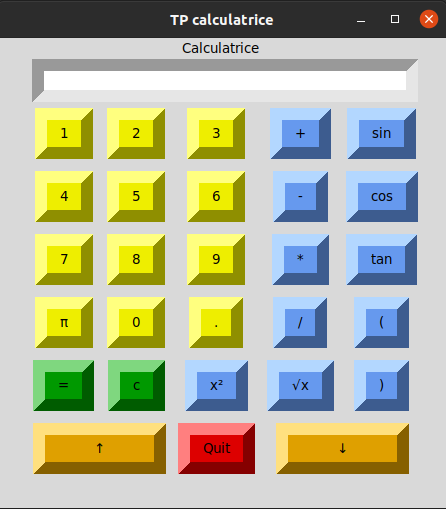

In [28]:
from IPython.display import Image
Image("screenshots/1.png")

### **On voit ici l'apparence de la calculatrice**

## **Ci-dessous l'utilisation des fonctions principales :**

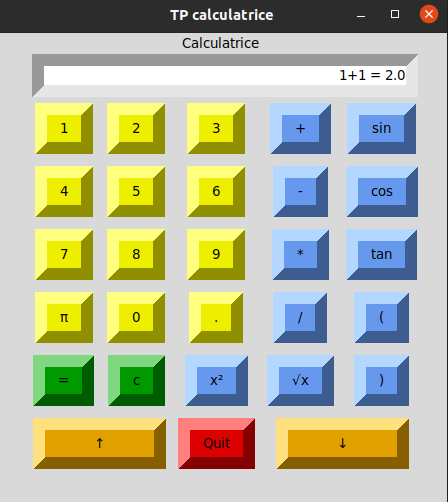

In [44]:
from IPython.display import Image
Image("screenshots/2.png")

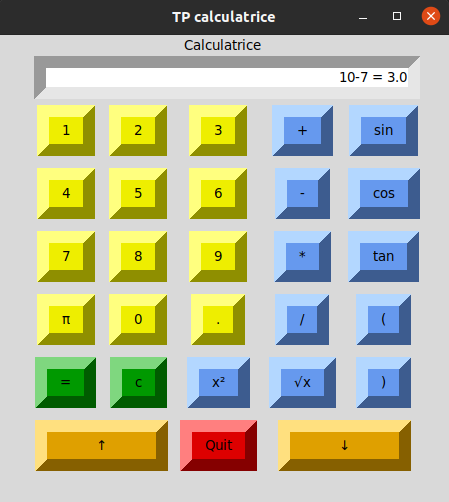

In [33]:
from IPython.display import Image
Image("screenshots/3.png")

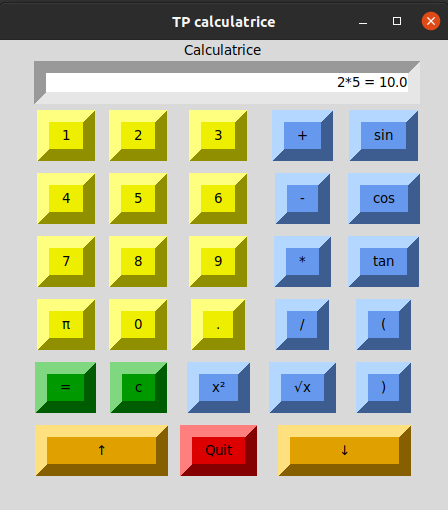

In [34]:
from IPython.display import Image
Image("screenshots/4.png")

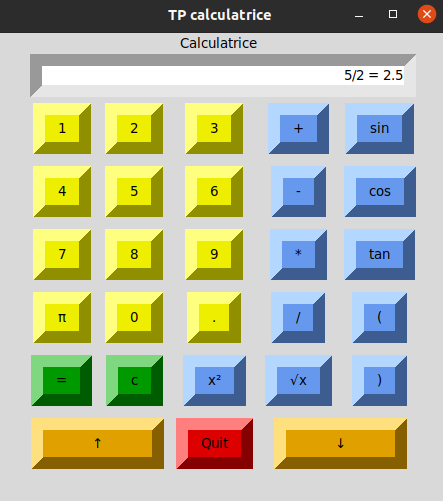

In [35]:
from IPython.display import Image
Image("screenshots/5.png")

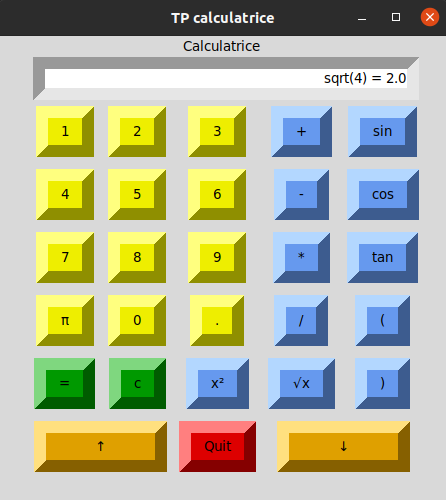

In [36]:
from IPython.display import Image
Image("screenshots/6.png")

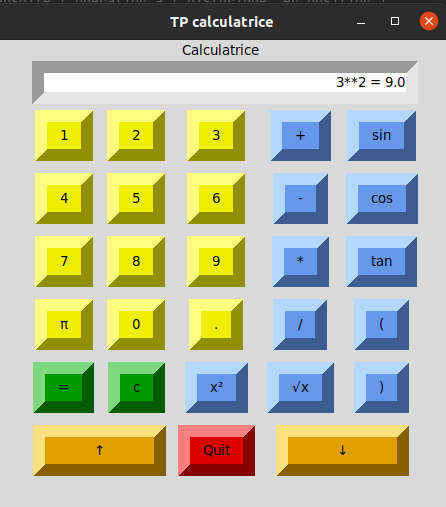

In [39]:
from IPython.display import Image
Image("screenshots/7.png")

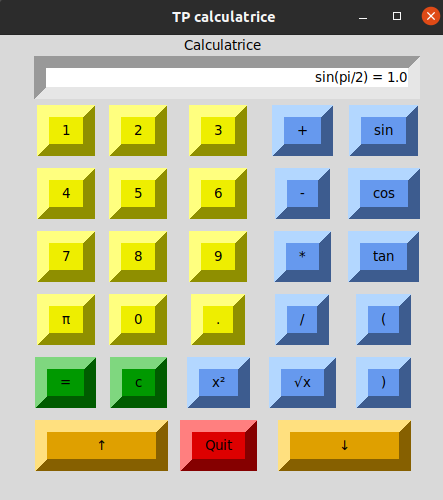

In [47]:
from IPython.display import Image
Image("screenshots/8.png")

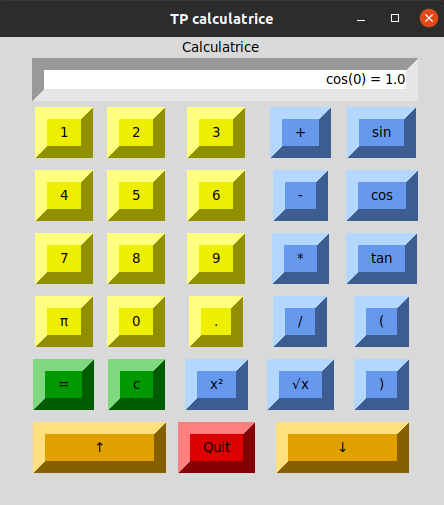

In [45]:
from IPython.display import Image
Image("screenshots/9.png")

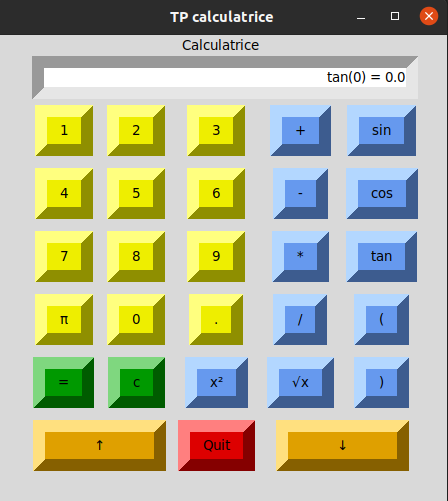

In [49]:
from IPython.display import Image
Image("screenshots/10.png")

## **Maintenant que l'on a montré les fonctions principales, on effectues quelques tests supplémentaires :**

### **Plusieurs opérations en même temps :**

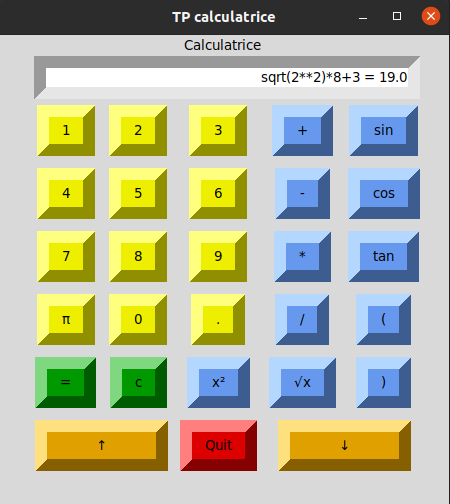

In [50]:
from IPython.display import Image
Image("screenshots/11.png")

### **Priorité des opérations :**

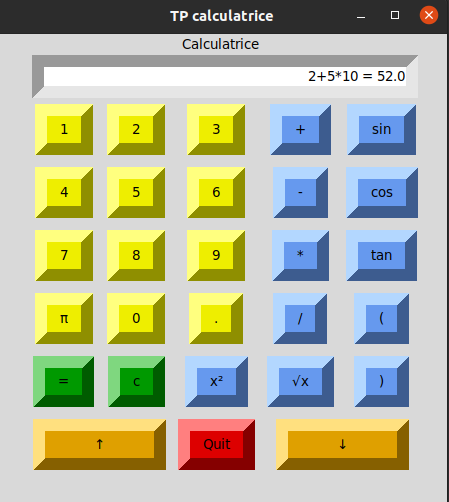

In [52]:
from IPython.display import Image
Image("screenshots/12.png")

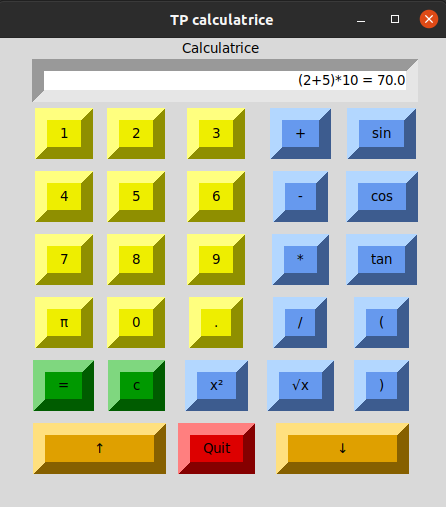

In [53]:
from IPython.display import Image
Image("screenshots/13.png")

## **Test des erreurs :**

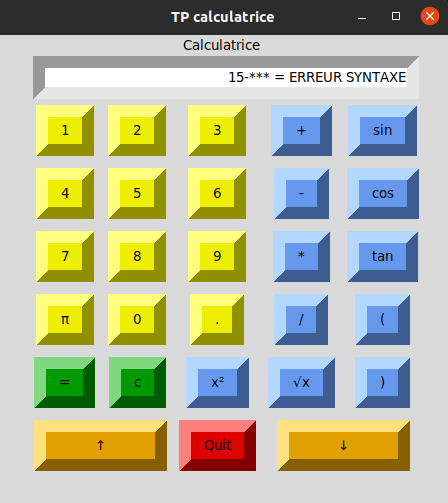

In [55]:
from IPython.display import Image
Image("screenshots/14.png")

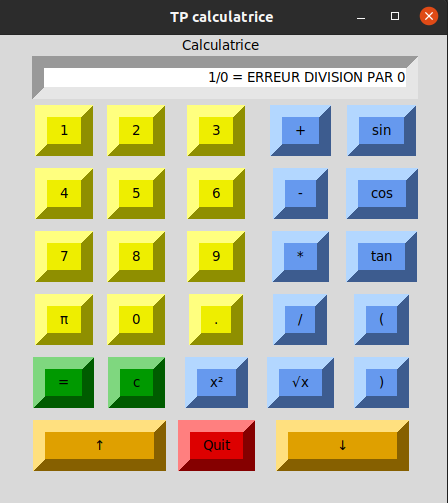

In [56]:
from IPython.display import Image
Image("screenshots/15.png")

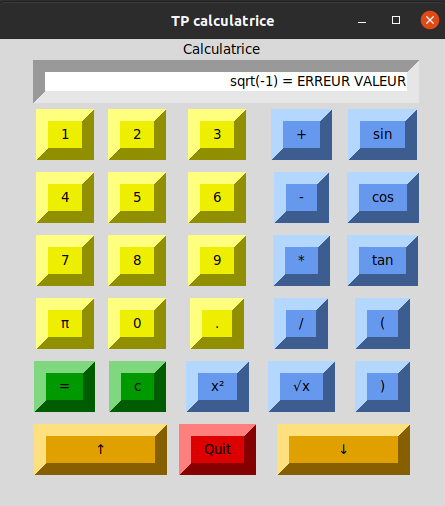

In [57]:
from IPython.display import Image
Image("screenshots/16.png")

### **Test des nombres négatifs et/ou à virgule :**

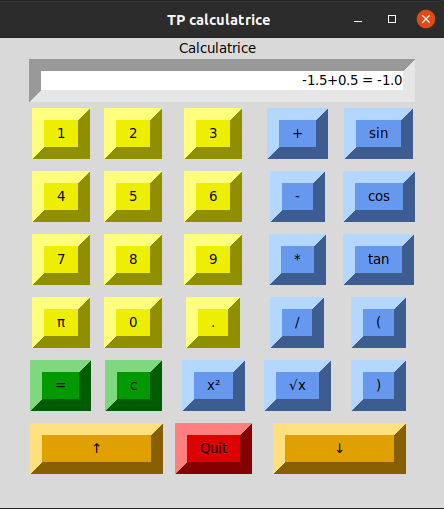

In [58]:
from IPython.display import Image
Image("screenshots/17.png")